# **Dog Cat Classification**

https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [35]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, BatchNormalization
from keras.utils import plot_model
import matplotlib.pyplot as plt

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:49<00:00, 25.0MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.2MB/s]


In [6]:
!pip install unzip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for unzip: filename=unzip-1.0.0-py3-none-any.whl size=1279 sha256=264fcd8a70f97b597680fc64caf98041abf8f691ccda0a41702138223b15a5ec
  Stored in directory: /root/.cache/pip/wheels/80/dc/7a/f8af45bc239e7933509183f038ea8d46f3610aab82b35369f4
Successfully built unzip


In [7]:
!unzip '/content/dogs-vs-cats.zip'


Streaming output truncated to the last 5000 lines.
  inflating: train/dogs/dog.4419.jpg  
  inflating: train/dogs/dog.442.jpg  
  inflating: train/dogs/dog.4420.jpg  
  inflating: train/dogs/dog.4421.jpg  
  inflating: train/dogs/dog.4422.jpg  
  inflating: train/dogs/dog.4424.jpg  
  inflating: train/dogs/dog.4425.jpg  
  inflating: train/dogs/dog.4426.jpg  
  inflating: train/dogs/dog.4427.jpg  
  inflating: train/dogs/dog.4431.jpg  
  inflating: train/dogs/dog.4433.jpg  
  inflating: train/dogs/dog.4436.jpg  
  inflating: train/dogs/dog.4438.jpg  
  inflating: train/dogs/dog.4439.jpg  
  inflating: train/dogs/dog.444.jpg  
  inflating: train/dogs/dog.4440.jpg  
  inflating: train/dogs/dog.4441.jpg  
  inflating: train/dogs/dog.4442.jpg  
  inflating: train/dogs/dog.4443.jpg  
  inflating: train/dogs/dog.4444.jpg  
  inflating: train/dogs/dog.4445.jpg  
  inflating: train/dogs/dog.4446.jpg  
  inflating: train/dogs/dog.445.jpg  
  inflating: train/dogs/dog.4450.jpg  
  inflating: tra

In [17]:
training_data = tf.keras.utils.image_dataset_from_directory(
    directory='/content/dogs_vs_cats/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
)

testing_data = tf.keras.utils.image_dataset_from_directory(
    directory='/content/dogs_vs_cats/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [18]:
def normalize(image, label):
  image = tf.cast(image/255. , tf.float32) 
  return image, label

training_data = training_data.map(normalize)
testing_data = testing_data.map(normalize)

In [19]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 256, 256, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 128, 128, 64)     256       
 hNormalization)                                                 
                                                      

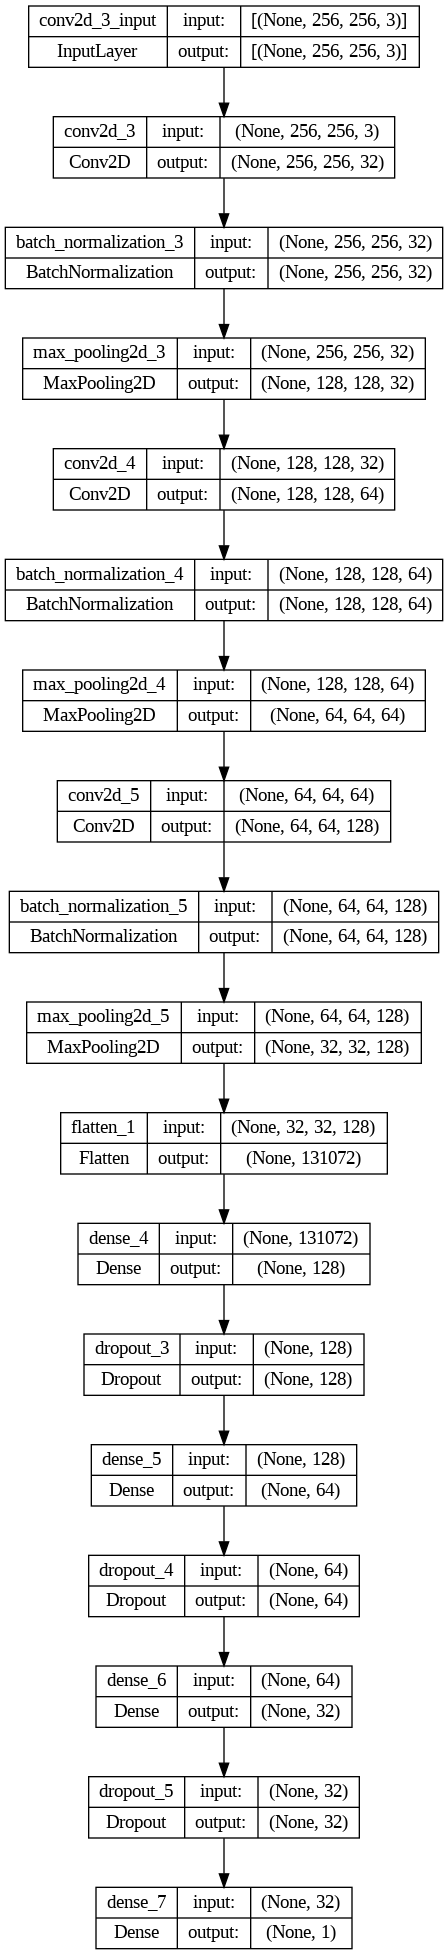

In [21]:
plot_model(model, show_shapes=True)

In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(training_data, epochs=8, validation_data=testing_data)

Epoch 1/8
625/625 [==============================] - 71s 106ms/step - loss: 1.2651 - accuracy: 0.5323 - val_loss: 0.6756 - val_accuracy: 0.5518
Epoch 2/8
625/625 [==============================] - 65s 104ms/step - loss: 0.6600 - accuracy: 0.6141 - val_loss: 0.6267 - val_accuracy: 0.6206
Epoch 3/8
625/625 [==============================] - 66s 105ms/step - loss: 0.5921 - accuracy: 0.6847 - val_loss: 0.5714 - val_accuracy: 0.6984
Epoch 4/8
625/625 [==============================] - 64s 103ms/step - loss: 0.5281 - accuracy: 0.7402 - val_loss: 0.5301 - val_accuracy: 0.7186
Epoch 5/8
625/625 [==============================] - 67s 106ms/step - loss: 0.4677 - accuracy: 0.7814 - val_loss: 0.4535 - val_accuracy: 0.7832
Epoch 6/8
625/625 [==============================] - 66s 105ms/step - loss: 0.4029 - accuracy: 0.8195 - val_loss: 0.4947 - val_accuracy: 0.8036
Epoch 7/8
625/625 [==============================] - 66s 104ms/step - loss: 0.3446 - accuracy: 0.8497 - val_loss: 0.6007 - val_accuracy:

In [61]:
history.history['loss']

[1.2651339769363403,
 0.6600369811058044,
 0.5920549035072327,
 0.5281233191490173,
 0.4677075743675232,
 0.402898907661438,
 0.3445531129837036,
 0.2673620581626892]

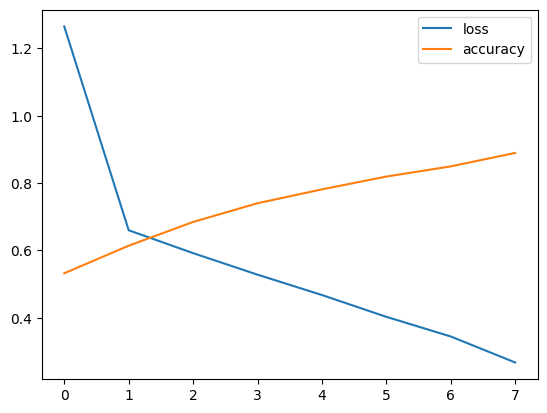

In [63]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.show()

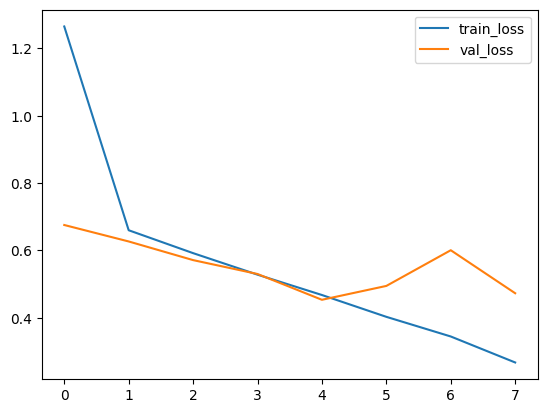

In [66]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

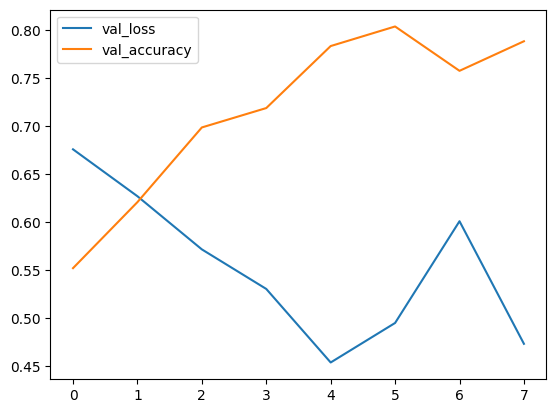

In [67]:
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [24]:
model.save('dog_cat_classifire.h5')

In [26]:
import cv2

In [41]:
cat_image = cv2.imread('/content/dogs_vs_cats/test/cats/cat.3278.jpg')

In [42]:
cat_image

array([[[183, 182, 178],
        [184, 183, 179],
        [185, 184, 180],
        ...,
        [169, 170, 174],
        [167, 170, 175],
        [167, 170, 175]],

       [[183, 182, 178],
        [184, 183, 179],
        [185, 184, 180],
        ...,
        [169, 170, 174],
        [167, 170, 175],
        [167, 170, 175]],

       [[183, 182, 178],
        [184, 183, 179],
        [185, 184, 180],
        ...,
        [170, 171, 175],
        [168, 171, 176],
        [168, 171, 176]],

       ...,

       [[154, 163, 167],
        [153, 162, 166],
        [153, 162, 166],
        ...,
        [115, 141, 165],
        [115, 141, 165],
        [115, 141, 165]],

       [[151, 160, 164],
        [151, 160, 164],
        [152, 161, 165],
        ...,
        [120, 147, 168],
        [119, 146, 167],
        [118, 145, 166]],

       [[151, 160, 164],
        [151, 160, 164],
        [152, 161, 165],
        ...,
        [120, 147, 168],
        [119, 146, 167],
        [118, 145, 166]]

In [43]:
cat_image = cv2.resize(cat_image, (256, 256))
input_cat_image = cat_image.reshape((1, 256, 256, 3))

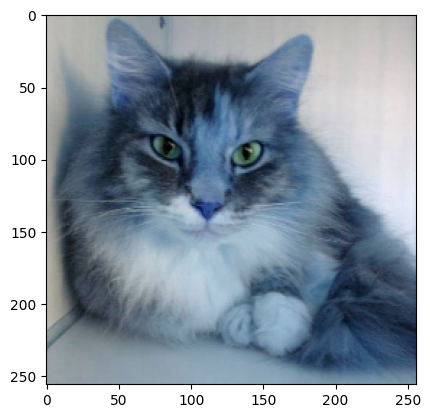

In [44]:
plt.imshow(cat_image)

In [71]:
prediction = model.predict(input_cat_image)

1/1 [==============================] - 0s 21ms/step


In [72]:
if prediction[0][0] > 0.5:
  print("Given Image is of Dog")
else:
  print("Given Image is of Cat")

Given Image is of Cat


In [54]:
dog_image= cv2.imread('/content/dogs_vs_cats/test/dogs/dog.10028.jpg')
dog_image = cv2.resize(dog_image, (256, 256))

In [55]:
input_dog_image = dog_image.reshape((1, 256, 256, 3))

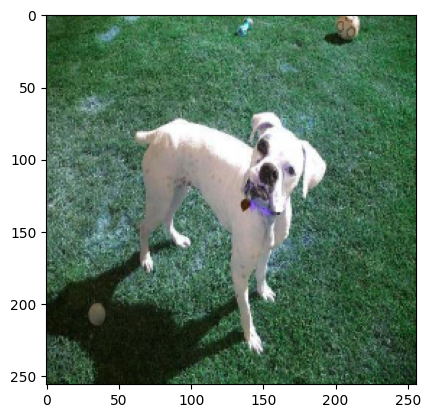

In [56]:
plt.imshow(dog_image)

In [69]:
prediction = model.predict(input_dog_image)

1/1 [==============================] - 0s 21ms/step


In [70]:
if prediction[0][0] > 0.5:
  print("Given Image is of Dog")
else:
  print("Given Image is of Cat")

Given Image is of Dog
